torch.Size([1000, 2]) torch.Size([1000, 1])
torch.Size([10, 2]) 
 torch.Size([10, 1])
tensor([[ 9.4343e-06],
        [-1.2833e-02]], requires_grad=True) tensor([0.], requires_grad=True)
train loss epoch 1 , loss: 0.039458
train loss epoch 2 , loss: 0.000153
train loss epoch 3 , loss: 0.000055
train loss epoch 4 , loss: 0.000054
train loss epoch 5 , loss: 0.000054
train loss epoch 6 , loss: 0.000055
train loss epoch 7 , loss: 0.000055
train loss epoch 8 , loss: 0.000054
train loss epoch 9 , loss: 0.000055
train loss epoch 10 , loss: 0.000054
tensor([[ 2.0001],
        [-3.3995]], requires_grad=True) tensor([4.2000], requires_grad=True)
w subtract tensor([-0.0001, -0.0005], grad_fn=<SubBackward0>)
b subtract tensor([3.1948e-05], grad_fn=<RsubBackward1>)


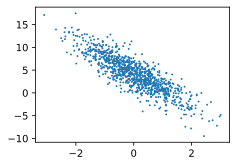

In [72]:
import torch
import random
from d2l import torch as d2l

def syn_data(w, b, num):
    X = torch.normal(0, 1, (num, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape(-1, 1)
    
w = torch.tensor([2, -3.4])
b = 4.2
features, labels = syn_data(w, b, 1000)
print(features.shape, labels.shape)

d2l.set_figsize()
d2l.plt.scatter(features[:, (1)].detach().numpy(), labels.detach().numpy(), 1)

def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]
        
batch_size = 10
for X, y in data_iter(batch_size, features, labels):
    print(X.shape, '\n', y.shape)
    break
    
w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
print(w, b)

def linreg(X, w, b):
    return torch.matmul(X, w) + b

def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

def sgd(params, lr, batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()
            
lr = 0.03
num_epochs = 10
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(linreg(X, w, b), y)
        l.sum().backward()
        sgd([w, b], lr, batch_size)
    with torch.no_grad():
        train_loss = loss(linreg(features, w, b), labels)
        print(f"train loss epoch {epoch + 1} , loss: {float(train_loss.mean()):f}")
        
print(w, b)
print("w subtract", true_w - w.reshape(true_w.shape))
print("b subtract", true_b - b)